# ЛР 4 — Фильтрация изображений

*Зубарева Марина, РИМ-181226*

In [1]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from skimage import img_as_float, img_as_ubyte
from skimage import filters
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data
%matplotlib inline

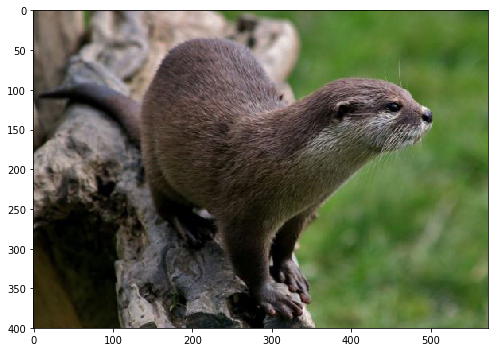

In [59]:
img = imread('otter.jpg')
plt.figure(figsize=(10,5))
imshow(img)

In [124]:
def compare_img2(img1, img2, label1='', label2=''):
    fig = plt.figure(figsize=(20, 15))  
    plt.subplot(1,3,1)
    plt.title(label1)
    plt.imshow(img1)
    plt.subplot(1,3,2)
    plt.title(label2)
    plt.imshow(img2)
    
def compare_img3(img1, img2, img3, label1='', label2='', label3=''):
    plt.figure(figsize=(20,15))
    plt.subplot(1,3,1)
    plt.title(label1)
    plt.imshow(img1)
    plt.subplot(1,3,2)
    plt.title(label2)
    plt.imshow(img2)
    plt.subplot(1,3,3)
    plt.title(label3)
    plt.imshow(img3)    

## Выделение скачков яркости

In [60]:
img_gray = rgb2gray(img)

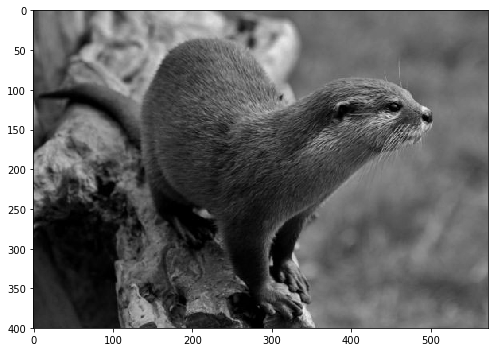

In [61]:
plt.figure(figsize=(10,5))
imshow(img_gray)

In [62]:
kernel_Dx = np.array([[0, 0, 0], 
                     [-1, 0, 1], 
                     [0, 0, 0]])

kernel_Dy = np.array([[0, 1, 0], 
                     [0, 0, 0], 
                     [0,-1, 0]])

In [63]:
res_Dx = convolve2d(img_gray, kernel_Dx, mode = "valid")
res_Dy = convolve2d(img_gray, kernel_Dy, mode = "valid")

<Figure size 432x288 with 0 Axes>

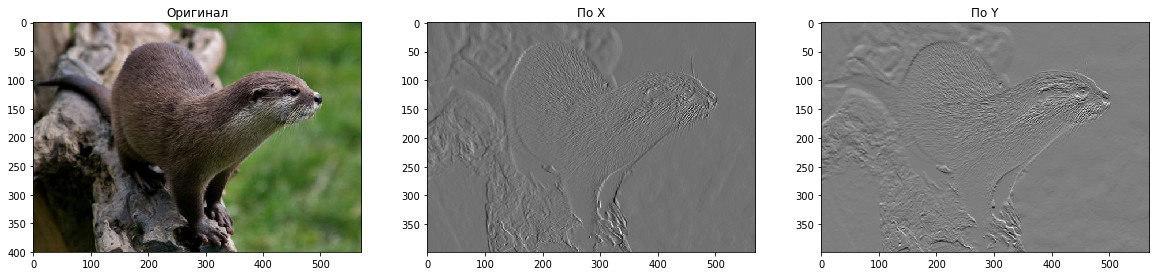

In [64]:
plt.set_cmap(cmap="gray")
compare_img3(img, res_Dx, res_Dy, 'Оригинал', 'По X', 'По Y')

## Фильтр Превитта

In [65]:
kernel_Px = np.array([[-1, 0, 1], 
                     [-1, 0, 1], 
                     [-1, 0, 1]])

kernel_Py = np.array([[-1,-1,-1], 
                     [0, 0, 0], 
                     [1, 1, 1]])

In [66]:
res_Px = convolve2d(img_gray, kernel_Px, mode = "valid")
res_Py = convolve2d(img_gray, kernel_Py, mode = "valid")

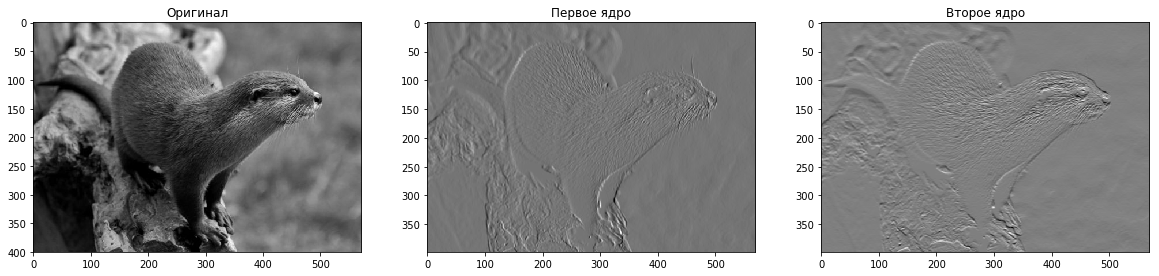

In [67]:
compare_img3(img_gray, res_Px, res_Py, 'Оригинал', 'Первое ядро', 'Второе ядро')

## Фильтр Собеля

In [68]:
kernel_Sx = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])

kernel_Sy = np.array([[-1, -2, -1], 
                     [0, 0, 0], 
                     [1, 2, 1]])

In [70]:
res_Sx = convolve2d(img_gray, kernel_Sx, mode = "valid")
res_Sy = convolve2d(img_gray, kernel_Sy, mode = "valid")

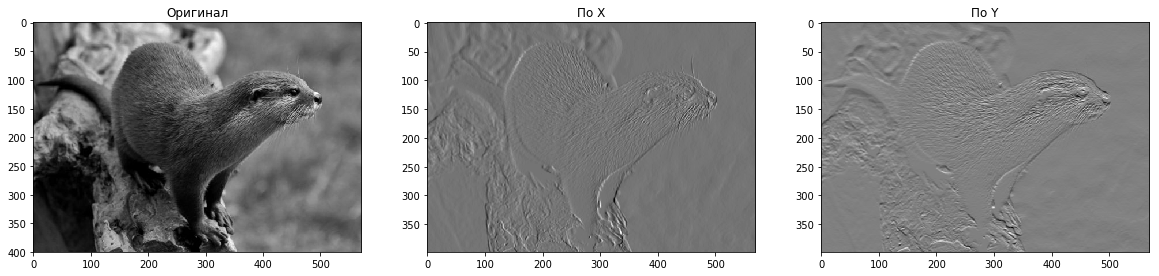

In [71]:
compare_img3(img_gray, res_Sx, res_Sy, 'Оригинал', 'По X', 'По Y')

## Разностный аналог лапласиана

In [72]:
kernel_L1 = np.array([[0, 1, 0], 
                     [1, -4, 1], 
                     [0, 1, 0]])

kernel_L2 = np.array([[1, 1, 1], 
                     [1, -8, 1], 
                     [1, 1, 1]])

In [73]:
res_L1 = convolve2d(img_gray, kernel_L1, mode = "valid")
res_L2 = convolve2d(img_gray, kernel_L2, mode = "valid")

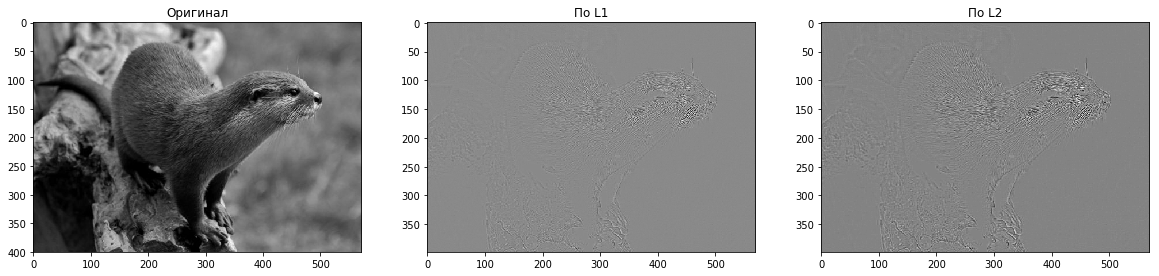

In [74]:
compare_img3(img_gray, res_L1, res_L2, 'Оригинал', 'По L1', 'По L2')

## Фильтр тиснения

In [80]:
kernel_E1 = np.array([[0, 1, 0], 
                     [1, 0, -1], 
                     [0, -1, 0]])

In [95]:
res_E1 = convolve2d(img_gray, kernel_E1, mode = "valid")

<Figure size 432x288 with 0 Axes>

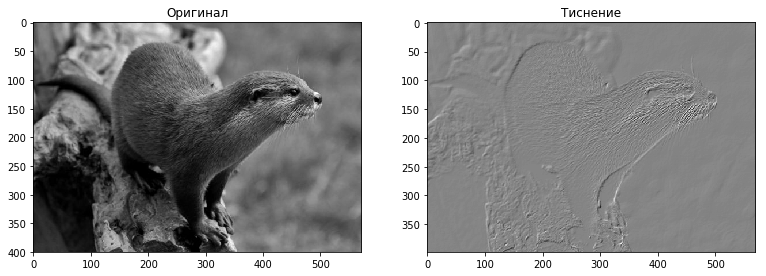

In [125]:
compare_img2(img_gray, res_E1, 'Оригинал', 'Тиснение')

## Фильтр повышения контрастности

In [110]:
kernel_KK1 = np.array([[-1, -1, -1], 
                       [-1, 9, -1], 
                       [-1, -1, -1]])

In [112]:
res_KK1 = convolve2d(img_gray, kernel_KK1, mode = "valid")

In [121]:
def high_contrast(img):
    img = rgb2yuv(img)
    Y = img[:,:,0]
    U = img[:,:,1]
    V = img[:,:,2]
    
    Y = convolve2d(Y, kernel_KK1, mode = "same") 
    U = convolve2d(U, kernel_KK1, mode = "same")
    V = convolve2d(V, kernel_KK1, mode = "same")
    img = np.dstack((Y,U,V))
    img = yuv2rgb(img) 
    img = np.clip(img, 0, 1)
    return img

In [122]:
img_high = high_contrast(img)

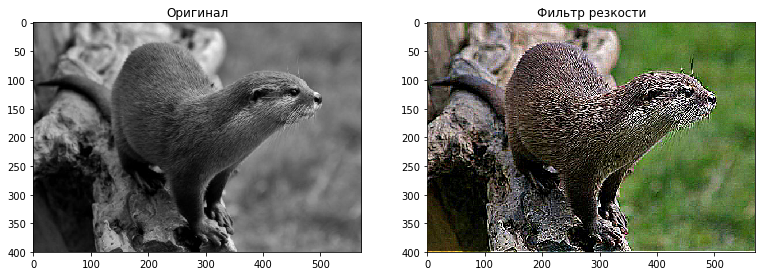

In [126]:
compare_img2(img_gray, img_high, 'Оригинал', 'Фильтр резкости')

## Выделение контуров изображений
### Робертс

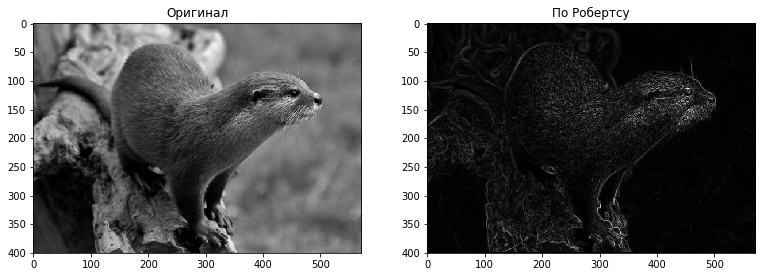

In [127]:
res_SR = filters.roberts(img_gray)
compare_img2(img_gray, res_SR, 'Оригинал', 'По Робертсу')

### Собель

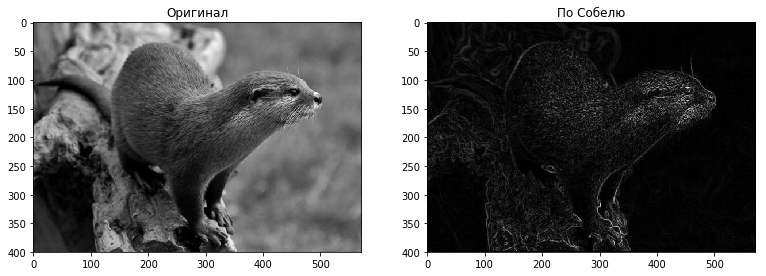

In [128]:
res_Sob = filters.roberts(img_gray)
compare_img2(img_gray, res_Sob, 'Оригинал', 'По Собелю')

### Шарр

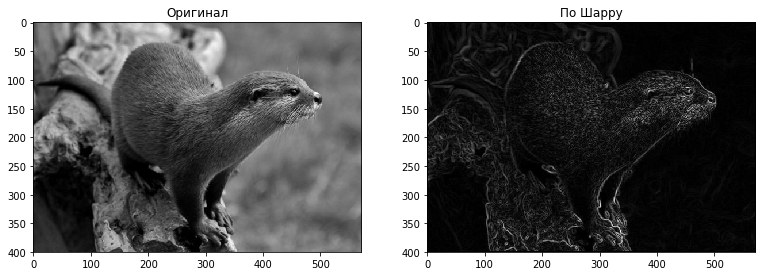

In [129]:
res_Schar = filters.scharr(img_gray)
compare_img2(img_gray, res_Schar, 'Оригинал', 'По Шарру')

### Превитт

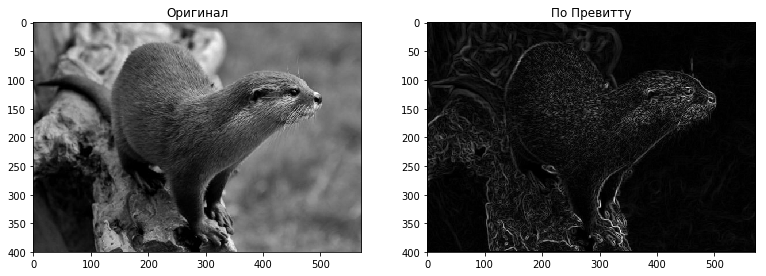

In [130]:
res_Prewitt = filters.prewitt(img_gray)
compare_img2(img_gray, res_Prewitt, 'Оригинал', 'По Превитту')